# Assignment 2 - Combine & Refine

For this assignment we will follow the CRISP-DM framework.

We will start by understanding what goals we are trying to achieve from our analysis. After that data understanding and data preparation will be done in tandem.
And then finally after the data is prepared and well understood, the data will be explored and visualized to potentially discover patterns and insights that will help us achieve our business goals.
The visualization is set up in a way that tells different stories about the data.

# Business understanding

The dataset contains information about students, courses, assesments and their performance on them. The dataset also contains what online materials the students accessed and when.

This data could be used to analyze how students study, their past performance and how that relates to their current academic performance.
It could also be used to optimize courses or evaluate other other teaching/assesment methods.

The description of all relevant data fields can be found in the `_Data Dictionary.docx` file.

## Data Understanding and Preparation

Creating dataframes for the provided data

In [184]:
import pandas as pd
pd.options.display.max_rows = 25
assessments_df = pd.read_csv('assignment data/assessments.csv')
courses_df = pd.read_csv('assignment data/courses.csv')
studentAssessment_df = pd.read_csv('assignment data/studentAssessment.csv')
studentRegistration_df = pd.read_csv('assignment data/studentRegistration.csv')
studentInfo_df = pd.read_csv('assignment data/studentInfo.csv')
studentVle_df = pd.read_csv('assignment data/studentVle.csv')
vle_df = pd.read_csv('assignment data/vle.csv')

In [185]:

assessments_df

code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA    NaN   
1           AAA             2013J           1753             TMA    NaN   
2           AAA             2013J           1754             TMA    NaN   
3           AAA             2013J           1755             TMA    NaN   
4           AAA             2013J           1756             TMA    NaN   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA    NaN   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam    NaN   

     weight  
0      10.0  
1      20.0  
2      20.0  
3      20.0  
4      30.0  
..      ...  
201     0.0  
202     0.0  
203     0.0  
204     0.0  
205   100.0  

[206 rows x 6 columns]

Looking at the date column, there seems to be many NaN values. Lets take a closer look.

In [186]:
assessments_df.isnull().sum()

code_module            0
code_presentation      0
id_assessment          0
assessment_type        0
date                 114
weight                 0
dtype: int64

114/206 dates are missing, this will be a problem in the future when we apply a learning model on this data. Dropping the column seems like the most appropriate way to handle it.

In [187]:
assessments_df = assessments_df.drop(columns=['date'])
assessments_df

code_module code_presentation  id_assessment assessment_type  weight
0           AAA             2013J           1752             TMA    10.0
1           AAA             2013J           1753             TMA    20.0
2           AAA             2013J           1754             TMA    20.0
3           AAA             2013J           1755             TMA    20.0
4           AAA             2013J           1756             TMA    30.0
..          ...               ...            ...             ...     ...
201         GGG             2014J          37443             CMA     0.0
202         GGG             2014J          37435             TMA     0.0
203         GGG             2014J          37436             TMA     0.0
204         GGG             2014J          37437             TMA     0.0
205         GGG             2014J          37444            Exam   100.0

[206 rows x 5 columns]

In [188]:
assessments_df.groupby(['code_module', 'code_presentation'])['weight'].sum()

code_module  code_presentation
AAA          2013J                200.0
             2014J                200.0
BBB          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
CCC          2014B                300.0
             2014J                300.0
DDD          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
EEE          2013J                200.0
             2014B                200.0
             2014J                200.0
FFF          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
GGG          2013J                100.0
             2014B                100.0
             2014J                100.0
Name: weight, dtype: float64

Its weird that some code modules have weights that add up to more than 200. Normally the weights should add up to 200 if the course 'TMA' and 'CMA' assessments have weights according to the data dictionary. Inspecting the data more closely, we notice that all 'Exam' assessments have a weight of a '100'. 'CCC' modules have 2 exams and a number of 'TMA' and 'CMA' assessments. Each exam is of weight 100 and the 'TMA' and 'CMA' assessments add up to 100 which make 300. 'GGG' modules have 0 weights for 'TMA' and 'CMA' assessments which is why the weights add up to 100. Lets take a closer look at 'CCC' modules to try to understand why the weights add up to 300.

In [189]:
assessments_df.query('code_module == "CCC"')

code_module code_presentation  id_assessment assessment_type  weight
54         CCC             2014B          24286             CMA     2.0
55         CCC             2014B          24287             CMA     7.0
56         CCC             2014B          24288             CMA     8.0
57         CCC             2014B          24289             CMA     8.0
58         CCC             2014B          24282             TMA     9.0
59         CCC             2014B          24283             TMA    22.0
60         CCC             2014B          24284             TMA    22.0
61         CCC             2014B          24285             TMA    22.0
62         CCC             2014B          24290            Exam   100.0
63         CCC             2014B          40087            Exam   100.0
64         CCC             2014J          24295             CMA     2.0
65         CCC             2014J          24296             CMA     7.0
66         CCC             2014J          24297             CMA     8.0
67         CCC             2014J          24298             CMA     8.0
68         CCC             2014J          24291             TMA     9.0
69         CCC             2014J          24292             TMA    22.0
70         CCC             2014J          24293             TMA    22.0
71         CCC             2014J          24294             TMA    22.0
72         CCC             2014J          24299            Exam   100.0
73         CCC             2014J          40088            Exam   100.0

We see that the id_assessment follows a pattern except for the the second exam where the id jumps from 24k to 40k. Maybe we can get some more clues if we see the assessments of these exams.

In [190]:
studentAssessment_df.query('id_assessment >= 40087')

Empty DataFrame
Columns: [id_assessment, id_student, date_submitted, is_banked, score]
Index: []

We notice that there are no assessments for the second exams of the 'CCC' module. Then we can drop the second exam assessment so that the weights add up to 200

In [191]:
assessments_df.drop([63, 73], axis=0, inplace=True)
assessments_df = assessments_df.reindex()

In [192]:
courses_df

code_module code_presentation  module_presentation_length
0          AAA             2113J                         268
1          AAA             2014J                         269
2          BBB             2113J                         268
3          BBB             2014J                         262
4          BBB             2013B                         240
5          BBB             2014B                         234
6          CCC             2014J                         269
7          CCC             2014B                         241
8          DDD             2113J                         261
9          DDD             2014J                         262
10         DDD             2013B                         240
11         DDD             2014B                         241
12         EEE             2113J                         268
13         EEE             2014J                         269
14         EEE             2014B                         241
15         FFF             2113J                         268
16         FFF             2014J                         269
17         FFF             2013B                         240
18         FFF             2014B                         241
19         GGG             2113J                         261
20         GGG             2014J                         269
21         GGG             2014B                         241

There are no missing values in the courses dataframe, but there seems to be an error with the code_presentation values, specifically the 2113J.

According to the data dictionary, the number in the code presentation is supposed to represent the year of the presentation. Looking at the assessments_df, we find that there is 2013J exists in the code_presentation column, but it doesn't exist in the code_presentation in the courses_df. 

In [193]:
courses_df['code_presentation'] = courses_df['code_presentation'].apply(lambda code: '2013J' if code[1] == '1' else code)

In [194]:
studentAssessment_df

id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]

In [195]:
studentAssessment_df.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

For the studentAssessment_df, there are a few missing values. Given the large dataframe, 173 missing values is small in comparision. We can either drop the rows with a missing score. Or we can replace the missing value with the median for that particular assignment.

In [196]:
studentAssessment_df['score'] = studentAssessment_df['score'].fillna(studentAssessment_df.groupby('id_assessment')['score'].transform('median'))

In [197]:
studentRegistration_df

code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  
0                      NaN  
1                      NaN  
2                     12.0  
3                      NaN  
4                      NaN  
...                    ...  
32588                  NaN  
32589                  NaN  
32590                  NaN  
32591                101.0  
32592                  NaN  

[32593 rows x 5 columns]

Looking at the date_registration, we can see negative values which is a bit hard to understand. Lets take a close look.

In [198]:
studentRegistration_df.groupby('code_presentation')['date_registration'].describe()

count       mean        std    min     25%   50%   75%  \
code_presentation                                                             
2013B               4676.0 -59.873396  44.343735 -310.0  -85.25 -50.0 -24.0   
2013J               8835.0 -75.763894  48.724015 -205.0 -109.00 -60.0 -36.0   
2014B               7786.0 -71.547264  56.369388 -322.0 -101.00 -54.0 -27.0   
2014J              11251.0 -66.908719  45.400702 -163.0 -101.00 -57.0 -29.0   

                     max  
code_presentation         
2013B              167.0  
2013J              101.0  
2014B               82.0  
2014J              110.0

In [199]:
studentRegistration_df.groupby('code_presentation')['date_registration'].value_counts()

code_presentation  date_registration
2013B              -22.0                203
                   -23.0                183
                   -24.0                170
                   -25.0                156
                   -30.0                154
                                       ... 
2014J               9.0                   1
                    11.0                  1
                    44.0                  1
                    83.0                  1
                    110.0                 1
Name: date_registration, Length: 881, dtype: int64

It seems that whether the course starts in February or October doesn't impact the date_registered value. Which means that the assumption of date_regsitered being relative to the year the course starts does not make too much sense, because if that were the case, then the mean of "J" presentations should be higher than the "B". So then the next assumption would be that the date_registered is relative to the start of the module, if that were the case, then the average should be more or less similar. There are a few positive values in the date_registrated, we can assume that the positive values are for students who registered for the course after it started.

In [200]:
studentRegistration_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

We will assume that students with missing date_unregistration are still enrolled by the time the data was collected. And we will replace the missing values of date_registered with the median

In [201]:
studentInfo_df

code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             NaN               NaN       28400    NaN              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1                        NaN   20-30%      NaN                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level    10-20     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  
0                  240          N         Pass  
1                   60          N         Pass  
2                   60          Y    Withdrawn  
3                   60          N         Pass  
4                   60          N         Pass  
...                ...        ...          ...  
32588               30          N         Fail  
32589               30          N  Distinction  
32590               30          Y         Pass  
32591               30          N    Withdrawn  
32592               30          N  Distinction  

[32593 rows x 12 columns]

In [202]:
studentInfo_df.isnull().sum()

code_module             3446
code_presentation       3446
id_student                 0
gender                  3446
region                     0
highest_education       3446
imd_band                1111
age_band                3446
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

There seem to be lots of missing data, lets see if the rows with missing data have something in common.

In [203]:
is_NaN = studentInfo_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = studentInfo_df[row_has_NaN]
rows_with_NaN

code_module code_presentation  id_student gender        region  \
1             NaN               NaN       28400    NaN      Scotland   
6             NaN               NaN       45462    NaN      Scotland   
9             AAA             2013J       53025      M  North Region   
14            NaN               NaN       63400    NaN      Scotland   
17            AAA             2013J       71361      M       Ireland   
...           ...               ...         ...    ...           ...   
32566         NaN               NaN     2052942    NaN      Scotland   
32569         NaN               NaN     2214722    NaN      Scotland   
32571         NaN               NaN     2268380    NaN      Scotland   
32576         NaN               NaN     2338614    NaN      Scotland   
32587         NaN               NaN     2620947    NaN      Scotland   

                 highest_education imd_band age_band  num_of_prev_attempts  \
1                              NaN   20-30%      NaN                     0   
6                              NaN   30-40%      NaN                     0   
9      Post Graduate Qualification      NaN     55<=                     0   
14                             NaN   40-50%      NaN                     0   
17                HE Qualification      NaN    35-55                     0   
...                            ...      ...      ...                   ...   
32566                          NaN   50-60%      NaN                     0   
32569                          NaN   70-80%      NaN                     0   
32571                          NaN   20-30%      NaN                     0   
32576                          NaN    0-10%      NaN                     0   
32587                          NaN   80-90%      NaN                     0   

       studied_credits disability final_result  
1                   60          N         Pass  
6                   60          N         Pass  
9                   60          N         Pass  
14                  60          N         Pass  
17                  60          N         Pass  
...                ...        ...          ...  
32566               30          N         Pass  
32569               30          N    Withdrawn  
32571               30          N         Pass  
32576               30          Y    Withdrawn  
32587               30          Y  Distinction  

[4545 rows x 12 columns]

In [204]:
studentInfo_df.query('region == "Scotland"')

code_module code_presentation  id_student gender    region  \
1             NaN               NaN       28400    NaN  Scotland   
6             NaN               NaN       45462    NaN  Scotland   
14            NaN               NaN       63400    NaN  Scotland   
62            NaN               NaN      164259    NaN  Scotland   
77            NaN               NaN      186149    NaN  Scotland   
...           ...               ...         ...    ...       ...   
32566         NaN               NaN     2052942    NaN  Scotland   
32569         NaN               NaN     2214722    NaN  Scotland   
32571         NaN               NaN     2268380    NaN  Scotland   
32576         NaN               NaN     2338614    NaN  Scotland   
32587         NaN               NaN     2620947    NaN  Scotland   

      highest_education imd_band age_band  num_of_prev_attempts  \
1                   NaN   20-30%      NaN                     0   
6                   NaN   30-40%      NaN                     0   
14                  NaN   40-50%      NaN                     0   
62                  NaN   70-80%      NaN                     0   
77                  NaN   30-40%      NaN                     0   
...                 ...      ...      ...                   ...   
32566               NaN   50-60%      NaN                     0   
32569               NaN   70-80%      NaN                     0   
32571               NaN   20-30%      NaN                     0   
32576               NaN    0-10%      NaN                     0   
32587               NaN   80-90%      NaN                     0   

       studied_credits disability final_result  
1                   60          N         Pass  
6                   60          N         Pass  
14                  60          N         Pass  
62                  60          N         Pass  
77                  60          N         Pass  
...                ...        ...          ...  
32566               30          N         Pass  
32569               30          N    Withdrawn  
32571               30          N         Pass  
32576               30          Y    Withdrawn  
32587               30          Y  Distinction  

[3446 rows x 12 columns]

A quick look at the results here, we can see that all students from Scotland are missing code_module, code_presentation, gender, highest_education and age_band data. While some other regions are missing imd_band data. We will assume that the reason the 'Scotland' data is missing is a technical one. For this dataframe we will first clean up some of the values, then fill the missing "Scotland" with random data while also preserving the proportions of the columns. For the code_module and presentation we will fill the missing data with unknown. We will do the same for the missing imd_band data.

In [205]:
import random as r

from pandas import isnull

studentInfo_df['age_band'] = studentInfo_df['age_band'].apply(lambda x : '>=55' if x == '55<=' else x)
studentInfo_df['imd_band'] = studentInfo_df['imd_band'].apply(lambda x : '10-20%' if x == '10-20' else x)
studentInfo_df['disability'] = studentInfo_df['disability'].apply(lambda x : 1 if x == 'Y' else 0)

ratioGenderBias = studentInfo_df['gender'].value_counts()['M'] / studentInfo_df['gender'].value_counts()['F'] - 1

alevRa = studentInfo_df['highest_education'].value_counts()['A Level or Equivalent'] / studentInfo_df['highest_education'].value_counts().sum()
lowARa = studentInfo_df['highest_education'].value_counts()['Lower Than A Level'] / studentInfo_df['highest_education'].value_counts().sum()
hERa = studentInfo_df['highest_education'].value_counts()['HE Qualification'] / studentInfo_df['highest_education'].value_counts().sum()
noFoRa = studentInfo_df['highest_education'].value_counts()['No Formal quals'] / studentInfo_df['highest_education'].value_counts().sum()
postRa = studentInfo_df['highest_education'].value_counts()['Post Graduate Qualification'] / studentInfo_df['highest_education'].value_counts().sum()

age1 = studentInfo_df['age_band'].value_counts()['0-35'] / studentInfo_df['age_band'].value_counts().sum()
age2 = studentInfo_df['age_band'].value_counts()['35-55'] / studentInfo_df['age_band'].value_counts().sum()
age3 = studentInfo_df['age_band'].value_counts()['>=55'] / studentInfo_df['age_band'].value_counts().sum()




def genderfiller(s, r):
    if pd.isnull(s) and r > 0.5:
        return 'M'
    elif pd.isnull(s) and r <= 0.5:
        return 'F'
    else:
        return s
def educationFiller(s, r):
    if pd.isnull(s) and r < alevRa:
        return 'A Level or Equivalent'
    elif pd.isnull(s) and r > alevRa and r <= alevRa + lowARa:
        return 'Lower Than A Level'
    elif pd.isnull(s) and r > alevRa + lowARa and r <= hERa + alevRa + lowARa:
        return 'HE Qualification'
    elif pd.isnull(s) and r > alevRa + lowARa + hERa and r <= hERa + alevRa + lowARa + noFoRa:
        return 'No Formal quals'
    elif pd.isnull(s) and r > alevRa + lowARa + hERa + noFoRa and r <= hERa + alevRa + lowARa + noFoRa + postRa:
        return 'Post Graduate Qualification'
    else:
        return s

def ageFiller(s, r):
    if pd.isnull(s) and r < age1:
        return '0-35'
    elif pd.isnull(s) and r > age1 and r <= age1 + age2:
        return '35-55'
    elif pd.isnull(s) and r > age1 + age2 and r <= age1 + age2 + age3:
        return '>=55'
    else:
        return s



studentInfo_df['gender'] = studentInfo_df['gender'].apply(lambda x : genderfiller(x, r.random() + ratioGenderBias))

studentInfo_df['highest_education'] = studentInfo_df['highest_education'].apply(lambda x : educationFiller(x, r.random()))

studentInfo_df['age_band'] = studentInfo_df['age_band'].apply(lambda x : ageFiller(x, r.random()))

studentInfo_df['code_module'] = studentInfo_df['code_module'].fillna('Unknown')

studentInfo_df['code_presentation'] = studentInfo_df['code_presentation'].fillna('Unknown')

studentInfo_df['imd_band'] = studentInfo_df['imd_band'].fillna('Unknown')

studentInfo_df

code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1         Unknown           Unknown       28400      M              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     >=55                     0   
1      A Level or Equivalent   20-30%     0-35                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level   10-20%     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits  disability final_result  
0                  240           0         Pass  
1                   60           0         Pass  
2                   60           1    Withdrawn  
3                   60           0         Pass  
4                   60           0         Pass  
...                ...         ...          ...  
32588               30           0         Fail  
32589               30           0  Distinction  
32590               30           1         Pass  
32591               30           0    Withdrawn  
32592               30           0  Distinction  

[32593 rows x 12 columns]

In [206]:
studentVle_df

code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]

## Data Visualization and Exploration

In this part the data will be visualized and explored in its confined section

### Potentially interesting correlations

In this segment, we will merge various dataframes and visualize correlations between the different columns so that we can discover some interesting information and look closer on the reasons behind the information and how it can help us achieve our business goals.

C:\Users\aliam\AppData\Local\Temp\ipykernel_12740\2989797217.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



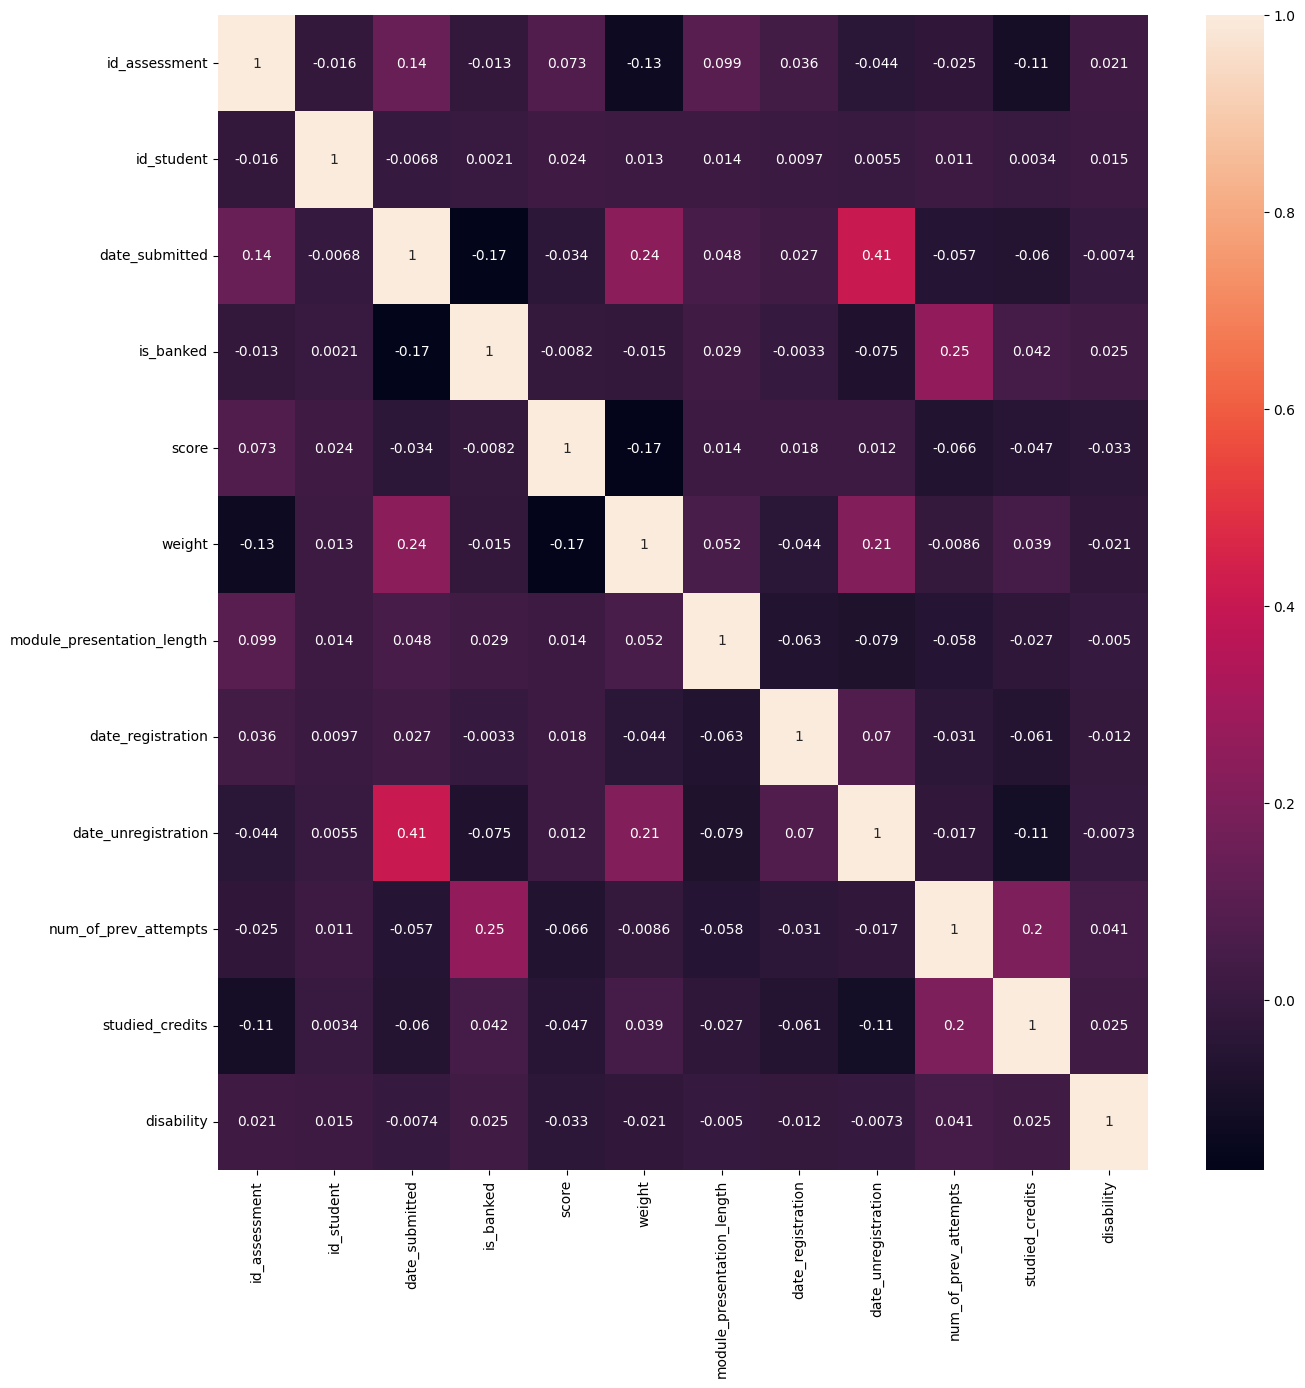

<Figure size 640x480 with 0 Axes>

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
fg, ax = plt.subplots()
fg.set_size_inches(15, 15)
as_cou = pd.merge(assessments_df, courses_df, how='left', on=['code_presentation', 'code_module'])
sta_as_cou = pd.merge(studentAssessment_df, as_cou, how='left', on='id_assessment')
str_sta_as_cou = pd.merge(sta_as_cou, studentRegistration_df , how='left', on=['id_student', 'code_module', 'code_presentation'])
stinf_str_sta_as_cou = pd.merge(str_sta_as_cou, studentInfo_df, how='left', on=['id_student', 'code_module', 'code_presentation'])
h1 = sns.heatmap(stinf_str_sta_as_cou.corr(), annot=True, ax=ax)
plt.show()
plt.clf()


We will only look at correlation that are -0.1 < and > 0.1. Anything in between is not significant enough.

1. [Weight and id_assessment] have a -0.13 which indicates that assessments that were created earlier have more impact on the final result
2. [is_banked and date_submitted] have a -0.17 which indicates that banked assessments are more likely to be submitted before the assessment deadline
3. [weight and date_submitted] have a 0.24 which means that assessments with more weight are often submitted later compared to lower weight assessments (makes sense)
4. [date_unregistered and date_submitted] have a 0.41 which may mean that students with late assessment submissions tend to unregister later.
5. [is_banked and number_of_prev_attempts] have a 0.25 correlation. This makes sense since banked assessment's score is stored then students may attempt the assessment multiple times to ensure the highest possible score they get is stored
6. [weight and score] -0.17 which means assessments with more weight tend to have lower score
7. [date_unregistered and study credits] -0.11, students who unregister also take less study credits
8. [study_credits and number of previous attempts] 0.2, makes sense

### How the assessment's weight affects the average score

In [208]:

import plotly.express as px

sa_as = pd.merge(studentAssessment_df, assessments_df, how='left', on='id_assessment')
sa_as = sa_as.drop(columns=['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'code_module', 'code_presentation', 'assessment_type'])
px.scatter(sa_as.groupby('weight').mean(), trendline="ols", title='Average Assignment Score as a function of Weight')


In the graph above, we notice that the average score for an assessment decreases as the weight for that assessment increases.

### How the course module and when it starts affects the final_result

In [209]:

grouped = studentInfo_df.groupby(['code_module', 'code_presentation'], as_index=False)['final_result'].value_counts(normalize=True)
grouped['module_date'] = grouped[['code_module', 'code_presentation']].apply(lambda row: row['code_module'] + " " + row['code_presentation'], axis=1)

px.histogram(grouped.query('code_module != "Unknown"'), x='module_date', y='proportion', barmode='group', color='final_result')

We can see some interesting information in course module 'CCC', perhaps the high withdraw rate is the reason for the presence of 2 exams. Maybe the exam assignment was reworked to try to solve the high withdrawal rate. 'GGG' module seem to have a higher failure rate than average. Maybe adding weights to the 'CMA' and 'TMA' assessments can help students better prepare for the exam assessment.

We also notice that for all the course modules, students perform better for modules starting in October or 'J' modules. The difference isn't significant though.

### How the score of CMA and TMA assessments correlates with the date submitted

<AxesSubplot: title={'center': 'Student assessment score for a CMA assessment in GGG module'}, xlabel='date_submitted', ylabel='score'>

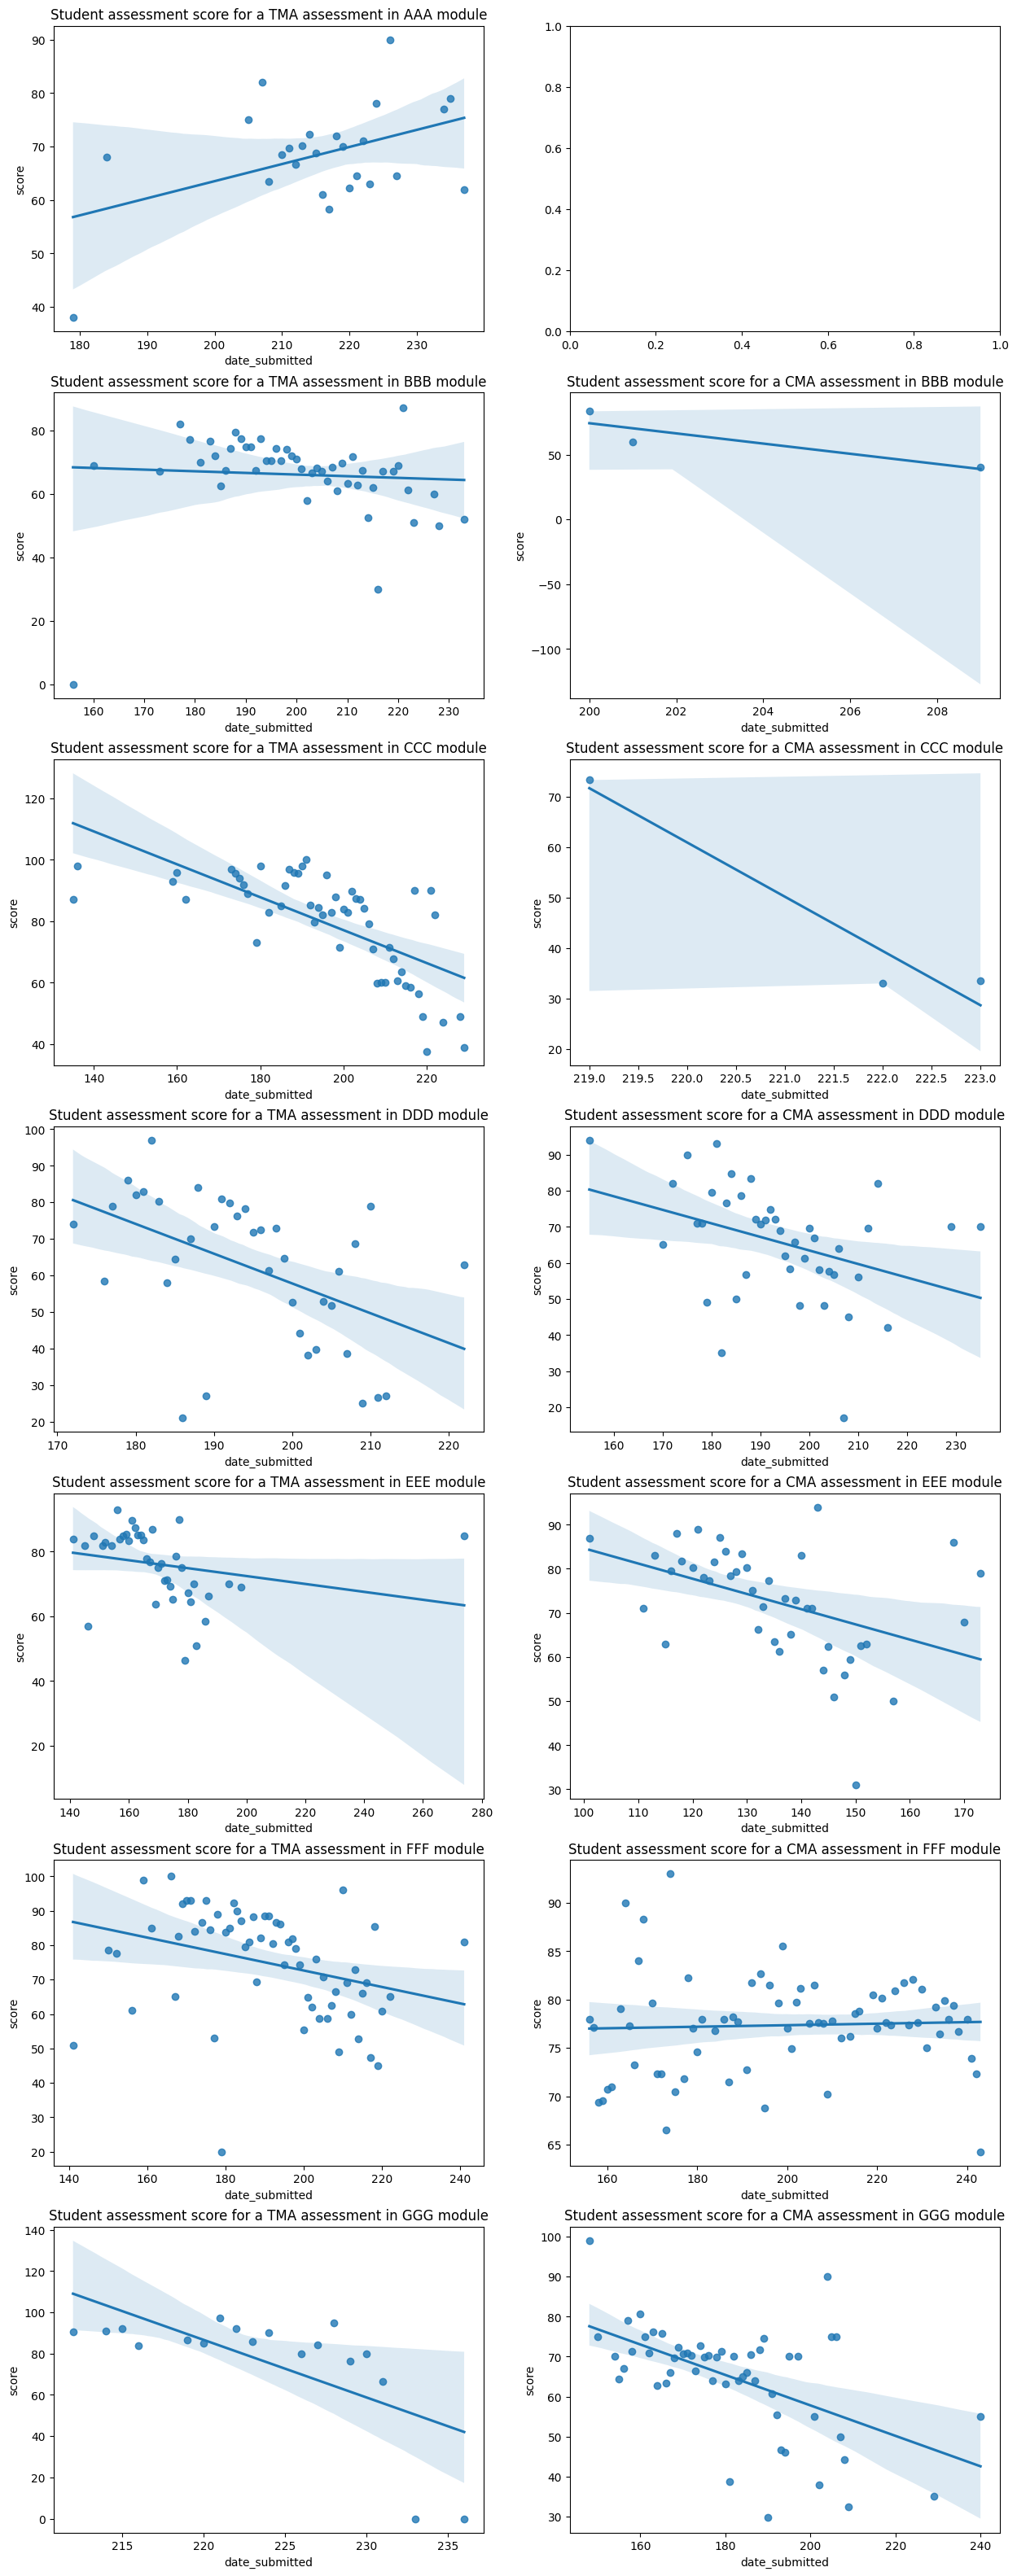

In [210]:
#ali
import matplotlib.pyplot as plt
import seaborn as sns
fg, ax = plt.subplots(7, 2)
fg.set_size_inches(15, 40)

#how the assignment submission date affects the ss
sss = pd.merge(studentAssessment_df, assessments_df, on='id_assessment')

gp = sss.groupby(['id_assessment', 'date_submitted'], as_index=False)['score'].mean()
gp = gp.drop(gp[gp['date_submitted'] <= 0].index)

ax[0,0].set_title("Student assessment score for a TMA assessment in AAA module")
sns.regplot(data=gp.query('id_assessment == 1762'), x='date_submitted', y='score', ax=ax[0,0])

ax[1,0].set_title("Student assessment score for a TMA assessment in BBB module")
sns.regplot(data=gp.query('id_assessment == 15024'), x='date_submitted', y='score', ax=ax[1,0])
ax[1,1].set_title("Student assessment score for a CMA assessment in BBB module")
sns.regplot(data=gp.query('id_assessment == 15019'), x='date_submitted', y='score', ax=ax[1,1])

ax[2,0].set_title("Student assessment score for a TMA assessment in CCC module")
sns.regplot(data=gp.query('id_assessment == 24294'), x='date_submitted', y='score', ax=ax[2,0])
ax[2,1].set_title("Student assessment score for a CMA assessment in CCC module")
sns.regplot(data=gp.query('id_assessment == 24298'), x='date_submitted', y='score', ax=ax[2,1])

ax[3,0].set_title("Student assessment score for a TMA assessment in DDD module")
sns.regplot(data=gp.query('id_assessment == 25360'), x='date_submitted', y='score', ax=ax[3,0])
ax[3,1].set_title("Student assessment score for a CMA assessment in DDD module")
sns.regplot(data=gp.query('id_assessment == 25367'), x='date_submitted', y='score', ax=ax[3,1])

ax[4,0].set_title("Student assessment score for a TMA assessment in EEE module")
sns.regplot(data=gp.query('id_assessment == 30722'), x='date_submitted', y='score', ax=ax[4,0])
ax[4,1].set_title("Student assessment score for a CMA assessment in EEE module")
sns.regplot(data=gp.query('id_assessment == 30721'), x='date_submitted', y='score', ax=ax[4,1])

ax[5,0].set_title("Student assessment score for a TMA assessment in FFF module")
sns.regplot(data=gp.query('id_assessment == 34903'), x='date_submitted', y='score', ax=ax[5,0])
ax[5,1].set_title("Student assessment score for a CMA assessment in FFF module")
sns.regplot(data=gp.query('id_assessment == 34909'), x='date_submitted', y='score', ax=ax[5,1])

ax[6,0].set_title("Student assessment score for a TMA assessment in GGG module")
sns.regplot(data=gp.query('id_assessment == 37443'), x='date_submitted', y='score', ax=ax[6,0])
ax[6,1].set_title("Student assessment score for a CMA assessment in GGG module")
sns.regplot(data=gp.query('id_assessment == 37437'), x='date_submitted', y='score', ax=ax[6,1])

#px.scatter(gp.query('id_assessment == 25355'), x='date_submitted', y='score', trendline='ols')


'AAA' modules does not have a CMA assessment. We can see a trend of decreasing score as it gets closer to the assessment deadline. 'Exam' assessments do not have a deadline or date submission so there is no point in showing them here.

### How the Age band affects the final result

Is there a relationship between age band and the final result?
We have 3 categories of age bands: 0-35, 35-55 and >= 55.
Let's see if students in different age bands have different final results.

In [211]:
from cgitb import text
import plotly.express as px
from locale import normalize
import seaborn as sns

px.histogram(studentInfo_df, x="age_band", color="final_result", barmode="group", category_orders=dict(age_band=["0-35", "35-55", ">=55"]))

If we look at the graph we can see that the final result looks to be the same for all age bands. For the graph above we use a number to see how many students passed, failed, withdrew or have a distinction. This would be easier to see if we use a percentage.

In [212]:
ageResult = studentInfo_df.groupby(['age_band', 'final_result'], group_keys=False).size().reset_index(name='count')
ageResult['percentage'] = ageResult.groupby('age_band', group_keys=False)['count'].apply(lambda x: 100 * x / float(x.sum()))
px.histogram(ageResult, text_auto=True, x="age_band", y="percentage", barmode="group", color="final_result", category_orders=dict(age_band=["0-35", "35-55", ">=55"]))

If we look at the age band and the final result we can see that the students of age band >= 55 have a higher distinction, 9.93% higher than students with age band of 0-35. This means that older students tend to perform better.
This could be due to the fact that they have more experience and are more mature. It could also be due to the fact that they are more motivated to do well in their studies. The result could also be simply selection bias, the number of students >=55 is very small relative to the rest. It could be that the >=55 students are simply students with high qualifications to begin with.

In [213]:
studentInfo_df.groupby('age_band', as_index=False)['highest_education'].value_counts(normalize=True)
px.histogram(studentInfo_df.groupby('age_band', as_index=False)['highest_education'].value_counts(normalize=True), x='age_band', y='proportion', color='highest_education')

We notice that probabilistically, older students tend to have higher qualification. This can explain their better final result performance.

### How the interaction with the VLE affects the final result

In [214]:
studentVleClicks = studentVle_df.groupby('id_student').sum(numeric_only = False).reset_index()

studentVleClicks = studentVleClicks[['id_student', 'sum_click']]

studentVleClicks = studentVleClicks.merge(studentInfo_df[['id_student', 'final_result']], on='id_student')
studentVleClicks
h = studentVleClicks.groupby('final_result').mean().reset_index()
px.bar(h, x='final_result', y='sum_click')

As we can see from the graph above, students who interacted with the course more often tend to have a higher distinction. This means that students who interacted with the course more often tend to perform better. This could be due to the fact that they are more motivated to do well in their studies.

### How banking the score affects the average score of the assessment

First lets look at the assessments that are banked (banked assessments are assessments that don't require future retakes to prove proficiency)

In [215]:
studentAssessment_df.query('is_banked == 1')

id_assessment  id_student  date_submitted  is_banked  score
1641             1758      603861              -1          1   61.0
1685             1758     1970390              -1          1   78.0
1690             1758     2073016              -1          1   60.0
1693             1758     2139353              -1          1   65.0
1708             1758     2358969              -1          1   68.0
...               ...         ...             ...        ...    ...
172516          37440      624767              -1          1  100.0
172526          37440      631446              -1          1  100.0
172717          37441      624767              -1          1  100.0
172727          37441      631446              -1          1  100.0
173239          37442      624767              -1          1  100.0

[1909 rows x 5 columns]

We notice that banked assessments seem to have a date_submitted of -1. Lets see why that is.

In [216]:
sts = pd.merge(studentAssessment_df, assessments_df, how='left', on='id_assessment')
sts.query('is_banked == 1')

id_assessment  id_student  date_submitted  is_banked  score  \
1641             1758      603861              -1          1   61.0   
1685             1758     1970390              -1          1   78.0   
1690             1758     2073016              -1          1   60.0   
1693             1758     2139353              -1          1   65.0   
1708             1758     2358969              -1          1   68.0   
...               ...         ...             ...        ...    ...   
172516          37440      624767              -1          1  100.0   
172526          37440      631446              -1          1  100.0   
172717          37441      624767              -1          1  100.0   
172727          37441      631446              -1          1  100.0   
173239          37442      624767              -1          1  100.0   

       code_module code_presentation assessment_type  weight  
1641           AAA             2014J             TMA    10.0  
1685           AAA             2014J             TMA    10.0  
1690           AAA             2014J             TMA    10.0  
1693           AAA             2014J             TMA    10.0  
1708           AAA             2014J             TMA    10.0  
...            ...               ...             ...     ...  
172516         GGG             2014J             CMA     0.0  
172526         GGG             2014J             CMA     0.0  
172717         GGG             2014J             CMA     0.0  
172727         GGG             2014J             CMA     0.0  
173239         GGG             2014J             CMA     0.0  

[1909 rows x 9 columns]

There does not seem to be any real reason behind the the -1 date_submitted for banked assessments. We can assume then that banked assessments are assessments provided to students and require to be submitted on the same day. We will now see how the banked flag affects the average score. We won't look at Exam assessments since there are no banked Exam assessments

In [217]:
sts.query('assessment_type != "Exam"').groupby('is_banked', as_index=False)['score'].mean()

is_banked      score
0          0  76.120322
1          1  74.344683

There's barely any difference.

### How the activity type clicks affects the final result

In [218]:
vle = vle_df[['id_site', 'activity_type']]
vle = vle.merge(studentVle_df[['id_site', 'id_student', 'sum_click']], on='id_site')
vle = vle.merge(studentInfo_df[['id_student', 'final_result']], on='id_student')
vle = vle.groupby(['activity_type', 'final_result']).sum().reset_index()
px.bar(vle, x='activity_type', y='sum_click', color='final_result')

### How does the region where a student comes from affects their score? And does the region indicate an imd_band

First we will look at the needed datasets.

In [219]:
studentInfo_df.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1     Unknown           Unknown       28400      M              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     >=55                     0   
1  A Level or Equivalent   20-30%     0-35                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits  disability final_result  
0              240           0         Pass  
1               60           0         Pass  
2               60           1    Withdrawn  
3               60           0         Pass  
4               60           0         Pass

In [220]:
studentAssessment_df.head()

id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0

To see how a students region affects their average score we need to make a new table that contains: StudentID, Region, Imd_band and avg_score.

In [221]:
studentInfo_Assessment_df = pd.merge(studentInfo_df, studentAssessment_df,
how='left', on='id_student')
studentInfo_Assessment_df

code_module code_presentation  id_student gender               region  \
0              AAA             2013J       11391      M  East Anglian Region   
1              AAA             2013J       11391      M  East Anglian Region   
2              AAA             2013J       11391      M  East Anglian Region   
3              AAA             2013J       11391      M  East Anglian Region   
4              AAA             2013J       11391      M  East Anglian Region   
...            ...               ...         ...    ...                  ...   
213161         GGG             2014J     2684003      F     Yorkshire Region   
213162         GGG             2014J     2684003      F     Yorkshire Region   
213163         GGG             2014J     2684003      F     Yorkshire Region   
213164         GGG             2014J     2684003      F     Yorkshire Region   
213165         GGG             2014J     2684003      F     Yorkshire Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     >=55                     0   
1       HE Qualification  90-100%     >=55                     0   
2       HE Qualification  90-100%     >=55                     0   
3       HE Qualification  90-100%     >=55                     0   
4       HE Qualification  90-100%     >=55                     0   
...                  ...      ...      ...                   ...   
213161  HE Qualification   50-60%    35-55                     0   
213162  HE Qualification   50-60%    35-55                     0   
213163  HE Qualification   50-60%    35-55                     0   
213164  HE Qualification   50-60%    35-55                     0   
213165  HE Qualification   50-60%    35-55                     0   

        studied_credits  disability final_result  id_assessment  \
0                   240           0         Pass         1752.0   
1                   240           0         Pass         1753.0   
2                   240           0         Pass         1754.0   
3                   240           0         Pass         1755.0   
4                   240           0         Pass         1756.0   
...                 ...         ...          ...            ...   
213161               30           0  Distinction        37437.0   
213162               30           0  Distinction        37438.0   
213163               30           0  Distinction        37439.0   
213164               30           0  Distinction        37440.0   
213165               30           0  Distinction        37441.0   

        date_submitted  is_banked  score  
0                 18.0        0.0   78.0  
1                 53.0        0.0   85.0  
2                115.0        0.0   80.0  
3                164.0        0.0   85.0  
4                212.0        0.0   82.0  
...                ...        ...    ...  
213161           169.0        0.0   60.0  
213162            73.0        0.0  100.0  
213163           150.0        0.0   60.0  
213164           172.0        0.0  100.0  
213165           206.0        0.0  100.0  

[213166 rows x 16 columns]

In [222]:
studentInfo_Assessment_df2 = studentInfo_Assessment_df[["id_student", "region", "imd_band", "score"]]
studentInfo_Assessment_df2.head()

id_student               region imd_band  score
0       11391  East Anglian Region  90-100%   78.0
1       11391  East Anglian Region  90-100%   85.0
2       11391  East Anglian Region  90-100%   80.0
3       11391  East Anglian Region  90-100%   85.0
4       11391  East Anglian Region  90-100%   82.0

Now we have a table with the student_id, region, imd_band and score. We want to alter this table to contain an average score for each student.

In [223]:
studentInfo_Assessment_df2.groupby(['id_student', 'score']).head()

id_student               region imd_band  score
0            11391  East Anglian Region  90-100%   78.0
1            11391  East Anglian Region  90-100%   85.0
2            11391  East Anglian Region  90-100%   80.0
3            11391  East Anglian Region  90-100%   85.0
4            11391  East Anglian Region  90-100%   82.0
...            ...                  ...      ...    ...
213161     2684003     Yorkshire Region   50-60%   60.0
213162     2684003     Yorkshire Region   50-60%  100.0
213163     2684003     Yorkshire Region   50-60%   60.0
213164     2684003     Yorkshire Region   50-60%  100.0
213165     2684003     Yorkshire Region   50-60%  100.0

[204480 rows x 4 columns]

Let's make a table to contain the average score of students per region

In [224]:
# average of score per region
region_avgScore_df = studentInfo_Assessment_df2.groupby('region')['score'].mean()
region_avgScore_df = region_avgScore_df.rename_axis('region').reset_index(name='region_avgScore')
region_avgScore_df

region  region_avgScore
0    East Anglian Region        75.466539
1   East Midlands Region        75.450302
2                Ireland        75.204599
3          London Region        74.193786
4           North Region        77.012957
5   North Western Region        73.773409
6               Scotland        76.089452
7      South East Region        76.873232
8           South Region        76.025379
9      South West Region        75.650270
10                 Wales        75.373169
11  West Midlands Region        74.722379
12      Yorkshire Region        74.536311

Now we make another table to contain the average score for each student

In [225]:
#get the mean score per student
studentInfo_Assessment_avgscore_df = studentInfo_Assessment_df2.groupby(['id_student', 'region', 'imd_band']).mean().reset_index()
studentInfo_Assessment_avgscore_df[studentInfo_Assessment_avgscore_df['id_student'] == 11391]

id_student               region imd_band  score
3       11391  East Anglian Region  90-100%   82.0

In [226]:
# show all scores from student 3733
studentInfo_Assessment_df2[studentInfo_Assessment_df2['id_student'] == 11391]

id_student               region imd_band  score
0       11391  East Anglian Region  90-100%   78.0
1       11391  East Anglian Region  90-100%   85.0
2       11391  East Anglian Region  90-100%   80.0
3       11391  East Anglian Region  90-100%   85.0
4       11391  East Anglian Region  90-100%   82.0

In the two above tables we can see that our studentInfo_Assessment_avgscore_df table correctly takes the mean of the score column. Lets rename the score column to avg_score to make it more understandable.

In [227]:
studentInfo_Assessment_avgscore_df['avg_score'] = studentInfo_Assessment_avgscore_df['score']
studentInfo_Assessment_avgscore_df = studentInfo_Assessment_avgscore_df.drop(['score'], axis=1)
studentInfo_Assessment_avgscore_df.head()

id_student               region imd_band  avg_score
0        3733         South Region  90-100%        NaN
1        6516             Scotland   80-90%       61.8
2        8462        London Region   30-40%       87.0
3       11391  East Anglian Region  90-100%       82.0
4       23629  East Anglian Region   20-30%       82.5

Now we can start making visualizations let's start with:

**How does the region affect the average score?**

Earlier we made a table to contain the average score of students for each regions.

Shown here:

In [228]:
region_avgScore_df

region  region_avgScore
0    East Anglian Region        75.466539
1   East Midlands Region        75.450302
2                Ireland        75.204599
3          London Region        74.193786
4           North Region        77.012957
5   North Western Region        73.773409
6               Scotland        76.089452
7      South East Region        76.873232
8           South Region        76.025379
9      South West Region        75.650270
10                 Wales        75.373169
11  West Midlands Region        74.722379
12      Yorkshire Region        74.536311

Now that we have the average score per region we can put this in a graph

In [229]:
# graph the average score per region
px.bar(region_avgScore_df, x='region', y='region_avgScore')

We can see that the average score of students for each region does not differ much from each other. **So we can conclude that the region a student comes from does not have an affect on their scores.**

Now we want to see if a region is associated with an imd_band score.

In [230]:
#number of students within a imd-band per region
imd_band_df = studentInfo_df.groupby(['region', 'imd_band']).count().reset_index()
imd_band_df = imd_band_df[['region', 'imd_band', 'id_student']]
imd_band_df = imd_band_df.rename(columns={'id_student': 'number_of_students'})
imd_band_df

region imd_band  number_of_students
0    East Anglian Region    0-10%                 103
1    East Anglian Region   10-20%                 163
2    East Anglian Region   20-30%                 306
3    East Anglian Region   30-40%                 364
4    East Anglian Region   40-50%                 411
..                   ...      ...                 ...
133     Yorkshire Region   60-70%                 156
134     Yorkshire Region   70-80%                 177
135     Yorkshire Region   80-90%                 114
136     Yorkshire Region  90-100%                  61
137     Yorkshire Region  Unknown                   5

[138 rows x 3 columns]

Lets try and visualize this.

In [231]:
# a bar graph for each imd_band for each region
px.bar(imd_band_df, x='region', y='number_of_students', color='imd_band')

From this chart we can deduce where the most students originating from a low imd_band come from. In this case we can infer from our data that this is from the **North Western Region**. We can also see that the **South Region** is the most wealthy.

From our earlier computations we can see that the averages of the student scores by region do not differ much but the **North Western Region** which happens to be the **poorest** has the **lowest average of student scores** which can be more clearly seen here

In [232]:
px.line(studentInfo_Assessment_df.groupby('imd_band', as_index=False)['score'].mean(), x='imd_band', y='score', title='Average score in relation to the imd_band')

Interestingly, students with missing imd_band data seem so have the highest average scores, perhaps students who come from an unknown imd_band, come from super wealthy areas that are not categorized by an imd_band score. Or it could simply mean that students with an unknown imd_band registered for easier modules

In [233]:
px.histogram(studentInfo_Assessment_df.groupby('code_module', as_index=False)['score'].mean().sort_values('score'), x='code_module', y='score')

We see that most modules have similar average scores besides 'AAA' and 'DDD'. So if students with imd_band unknown have low enrollment in these modules then maybe the average is higher because of that.

In [234]:
uk = studentInfo_df.query('imd_band == "Unknown"')["code_module"].value_counts(normalize=True)
nuk = studentInfo_df.query('imd_band != "Unknown"')["code_module"].value_counts(normalize=True)
uk.sort_values(ascending=False)

FFF        0.325833
DDD        0.252025
CCC        0.225923
EEE        0.101710
BBB        0.056706
AAA        0.020702
Unknown    0.010801
GGG        0.006301
Name: code_module, dtype: float64

In [235]:
nuk.sort_values(ascending=False)

BBB        0.226225
FFF        0.211740
DDD        0.169144
CCC        0.112668
Unknown    0.109078
GGG        0.078076
EEE        0.072200
AAA        0.020869
Name: code_module, dtype: float64

Looking at the above values, we see that students enrolled in 'AAA' and 'DDD' modules with imd_band unknown is (0.252 + 0.02 = 0.272) higher than those with a known imd_band (0.169 + 0.02 = 0.189) which means easier that the reason for higher average score for students with an unknown imd_band score is not because of higher proportion in easier modules, but rather that those with an unknown imd_band come from particularly affluent areas.

### How the registration date affects the pass rate

Now we want to see if the student registration has a correlation with the score or the final result.

Before we establish the business goals we should check the data.

In [236]:
studentRegistration_df.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN

We can see that a lot of students register themselves before the term starts. Let's check for outliers. What would be the latest registration of the year?

In [237]:
studentRegistration_df['date_registration'].max()

167.0

Lets try and find out how the registration affects the score and final results. **How do the late registrations affect the scores of a student?**

First we need to merge scores and final result to the studentRegistration table.

In [238]:
#Merge the studentInfo and studentRegistration dataframes
studentInfo_Registration_df = pd.merge(studentInfo_df, studentRegistration_df, on='id_student')
studentInfo_Registration_df.head()
#alter the table to contain only relevant columns
studentInfo_Registration_df = studentInfo_Registration_df[['id_student', 'date_registration', 'final_result']]
studentInfo_Registration_df.head()

id_student  date_registration final_result
0       11391             -159.0         Pass
1       28400              -53.0         Pass
2       30268              -92.0    Withdrawn
3       31604              -52.0         Pass
4       32885             -176.0         Pass

Now that we have a table with relevant data we will first take a look at the final scores. We will see if the assessment scores are affected by the registration date after because students might register mutiple times over multiple years so their scores shouldn't be averaged over all the registrations.

Lets see if there are multiple registrations for one student_id.

In [239]:
studentInfo_Registration_df.groupby('id_student').count().head()

date_registration  final_result
id_student                                 
3733                        1             1
6516                        1             1
8462                        4             4
11391                       1             1
23629                       1             1

We will keep this in mind for later but now we can start visualizing our data to see if the registration date correlates to a final score.

In [240]:
px.histogram(studentInfo_Registration_df, x='date_registration', color='final_result', barmode='group')

You can see that this graph isn't very clear. We can make it clearer to only categorize final result with only pass and fail values since distinction equals passing and we can drop the withdrawing students since we want to measure the end result after starting a year late.

In [241]:
# drop the students who have withdrawn
studentInfo_Registration_df = studentInfo_Registration_df[studentInfo_Registration_df['final_result'] != 'Withdrawn']
studentInfo_Registration_df['final_result'].unique()
# make all the students who achieved a Distinction a Pass
studentInfo_Registration_df['final_result'] = studentInfo_Registration_df['final_result'].replace('Distinction', 'Pass')
studentInfo_Registration_df['final_result'].unique()

array(['Pass', 'Fail'], dtype=object)

Now that we have dropped withdrawn students and normalized Distinction to Pass we should be able to make a clearer graph.

In [242]:
px.histogram(studentInfo_Registration_df, x='date_registration', color='final_result', barmode='group')

From this graph we can see that the bulk of the students register between a 100 days before the start of the year and at the start of the year. We should change this graph to only show students who have registered late.

In [243]:
# only include students who have registered after the start of the year
studentInfo_Registration_df = studentInfo_Registration_df[studentInfo_Registration_df['date_registration'] > 0]
studentInfo_Registration_df.head()

id_student  date_registration final_result
131      236284                2.0         Pass
214      341872               48.0         Fail
323     1472925               20.0         Fail
324     1472925                5.0         Fail
325     1472925               20.0         Pass

Now we can visualize the students who have registered late and their results.

In [244]:
px.histogram(studentInfo_Registration_df, x='date_registration', color='final_result', barmode='group')

In this graph we can see that students who register within 2 months of the school year still have the same chance to pass as the students who start at the beginning of the year (check above graph), However after the 2 months the distribution of students who pass and fail lies more heavily on the failing side. We can see that after 100 days in the school year there are no students who have passed.

### How the frequency interaction with the VLE affects the score

Let's take a look at the VLE dataframe and the assessments dataframe.

In [245]:
studentVle_df

code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]

In [246]:
studentAssessment_df

id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]

How do we check Vle activity for each student? We can make a new column that shows how many days a student has accessed the VLE this schoolyear.

In [247]:
#make a new dataframe with the relevant columns
studentVleClicks_df = studentVle_df[['id_student', 'date', 'sum_click']]
studentVleClicks_df.head()

id_student  date  sum_click
0       28400   -10          4
1       28400   -10          1
2       28400   -10          1
3       28400   -10         11
4       28400   -10          1

In [248]:
# make a column for the amount of days the student has accessed the VLE
studentVleClicks_df.groupby(['id_student', 'date']).count()

sum_click
id_student date           
6516       -23           6
           -22           7
           -20          12
           -17           4
           -12           2
...                    ...
2698588     240          3
            244          3
            248          2
            250          2
            258          1

[1737007 rows x 1 columns]

Now that we have a overview of access dates and clicks we can easily make a new dataframe to see how many days a student has been on the VLE and how active they are by taking an average of the amount of clicks.

In [249]:
#make a new dataframe of  the amount of days accessed
studentVLEaverage_df = studentVleClicks_df.groupby('id_student')['date'].count().reset_index(name='days_accessed')
#add a column of the average clicks for each student
studentVLEaverage_df['avg_clicks'] = studentVleClicks_df.groupby('id_student')['sum_click'].mean().reset_index(name='avg_clicks')['avg_clicks']
studentVLEaverage_df.head()

id_student  days_accessed  avg_clicks
0        6516            662    4.216012
1        8462            304    2.157895
2       11391            196    4.765306
3       23629             59    2.728814
4       23698            305    2.983607

Now that we have a table that contains the amount of days accessed and the avg clicks per day we can merge this data with the studentInfo table to see if the VLE interactment affects the final score. 

In [250]:
#merge the studentVLEaverage_df and studentInfo_df dataframes
merge_studentVLE_studentInfo_df = pd.merge(studentVLEaverage_df, studentInfo_df, on='id_student')
#drop the irrelevant columns
studentVLEaverage_df = merge_studentVLE_studentInfo_df[['id_student', 'days_accessed', 'avg_clicks', 'final_result']]
studentVLEaverage_df.head()

id_student  days_accessed  avg_clicks final_result
0        6516            662    4.216012         Pass
1        8462            304    2.157895    Withdrawn
2        8462            304    2.157895    Withdrawn
3       11391            196    4.765306         Pass
4       23629             59    2.728814         Fail

Now that we have the relevant data merged we can visualize it.

In [251]:
#graph the final score of the students who accessed the VLE
px.scatter(studentVLEaverage_df, x='days_accessed', y='avg_clicks', color='final_result')

As you can see the data isn't represented as expected. I expected the days_accessed to be within the schoolyear. So let's take a look at our table.

In [252]:
studentVle_df['date'].max()
#show amount of unique rows of date column for each student
studentVle_df.groupby('id_student')['date'].nunique().head()

id_student
6516     159
8462      56
11391     40
23629     16
23698     70
Name: date, dtype: int64

Now that we have the right amount of days of VLE interaction we can add these to the table

In [253]:
#drop days accessed column
studentVLEaverage_df = studentVLEaverage_df.drop(['days_accessed'], axis=1)
studentVLEaverage_df['days_accessed'] = studentVle_df.groupby('id_student')['date'].nunique().reset_index(name='days_accessed')['days_accessed']
studentVLEaverage_df.head()

id_student  avg_clicks final_result  days_accessed
0        6516    4.216012         Pass          159.0
1        8462    2.157895    Withdrawn           56.0
2        8462    2.157895    Withdrawn           40.0
3       11391    4.765306         Pass           16.0
4       23629    2.728814         Fail           70.0

Now we have the right data we can visualize them.

We can see that the max date of access is 269 days into the year. So we can conclude that instead of the amount of days we took the sum. Let's change this.

In [254]:
px.scatter(studentVLEaverage_df, x='days_accessed', y='avg_clicks', color='final_result')

There isn't much information to extract from the graph above. Maybe if we took a look at vle content that is only available for a limited period and compare that with vle content with no limit.

In [255]:
st_vle = pd.merge(studentVle_df, vle_df, how='left', on=['id_site', 'code_module', 'code_presentation'])
avgtemp = st_vle[st_vle.week_from.notnull()].groupby('id_site')['sum_click'].sum().mean()
avgperm = st_vle[st_vle.week_from.isnull()].groupby('id_site')['sum_click'].sum().mean()
data = [['Temporary', avgtemp], ['Permanent', avgperm]]
df = pd.DataFrame(data, columns=['site_type', 'average_clicks'])
px.bar(df, x='site_type', y='average_clicks')

### How previous academic performance affects success rate

(array([98., 69., 52., 25.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

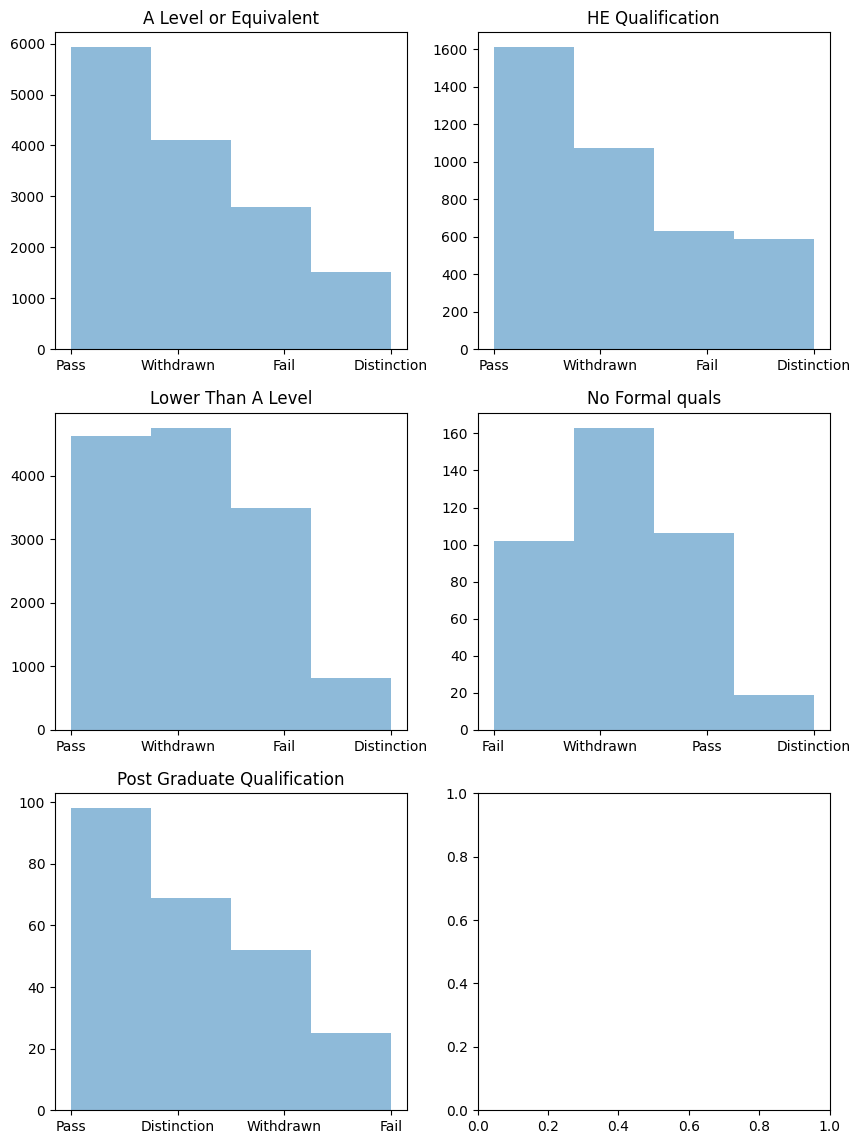

In [256]:
from locale import normalize
from numpy import histogram
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

x = studentInfo_df.groupby('highest_education')['final_result'].value_counts(normalize=True)

fg, ax = plt.subplots(3, 2)
fg.set_size_inches(10, 14)

ax[0, 0].set_title('A Level or Equivalent')
ax[0, 0].hist(studentInfo_df[studentInfo_df['highest_education'] == 'A Level or Equivalent']['final_result'], bins=4, alpha=0.5, label='A Level or Equivalent')

ax[0, 1].set_title('HE Qualification')
ax[0, 1].hist(studentInfo_df[studentInfo_df['highest_education'] == 'HE Qualification']['final_result'], bins=4, alpha=0.5, label='HE Qualification')

ax[1, 0].set_title('Lower Than A Level')
ax[1, 0].hist(studentInfo_df[studentInfo_df['highest_education'] == 'Lower Than A Level']['final_result'], bins=4, alpha=0.5, label='Lower Than A Level')

ax[1, 1].set_title('No Formal quals')
ax[1, 1].hist(studentInfo_df[studentInfo_df['highest_education'] == 'No Formal quals']['final_result'], bins=4, alpha=0.5, label='No Formal quals')

ax[2, 0].set_title('Post Graduate Qualification')
ax[2, 0].hist(studentInfo_df[studentInfo_df['highest_education'] == 'Post Graduate Qualification']['final_result'], bins=4, alpha=0.5, label='Post Graduate Qualification')

These different histograms tell us a lot about how student's qualification level affects the success rate.
In the first, second & last histograms we see that many students pass that have "A Level or Equivalent" or "HE Qualification". Added together, Fail/Withdrawn are smaller than Pass/Distinction.
In the fourth histogram, it is abundantly clear that people with no previous quals do not pass or give up.
The Third histogram shows that people with a qualification lower than A Level have a harder time. Both pass/distinction summed and fail/withdrawn sum are about the same.

From this we can conclude that a good earlier study has a positive effect on the chance of success.

### How previous attempts affect success rate

(array([1., 0., 2., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 <BarContainer object of 4 artists>)

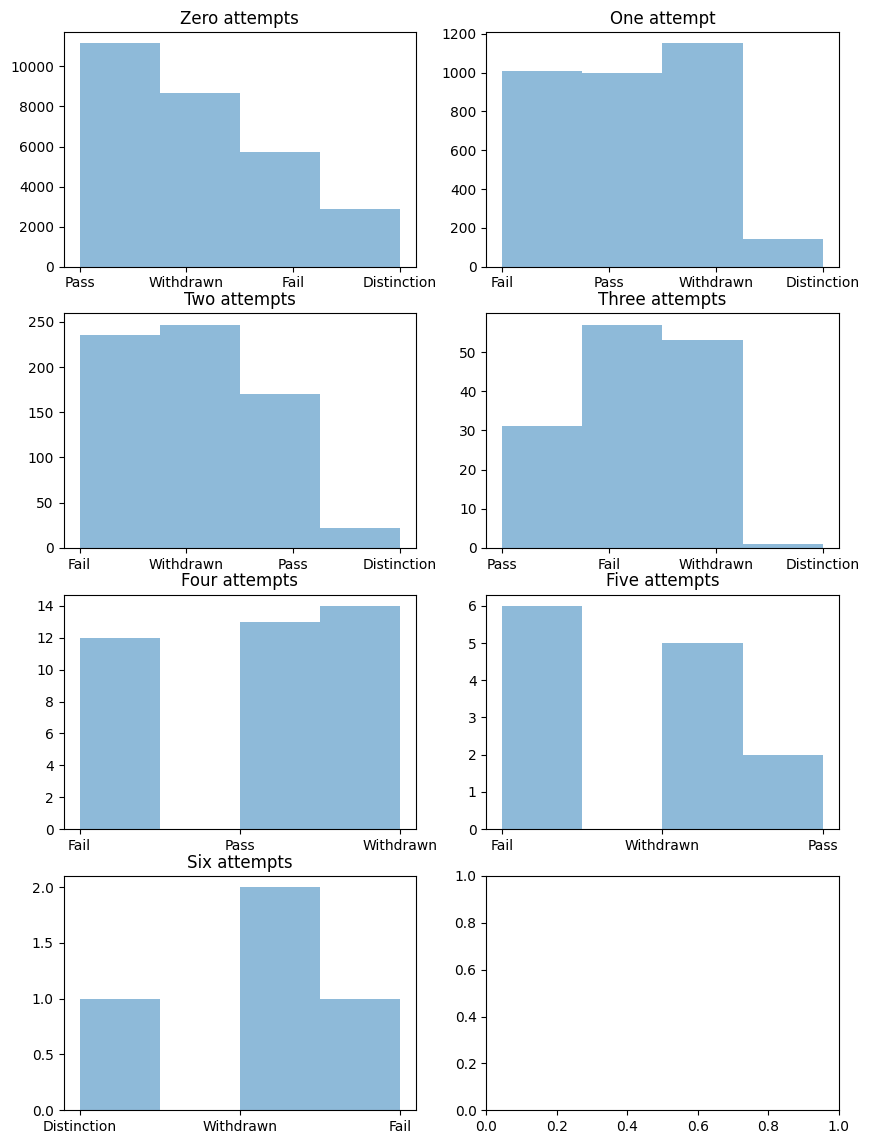

In [257]:

x = studentInfo_df.groupby('num_of_prev_attempts')['final_result'].value_counts(normalize=True)

fg, ax = plt.subplots(4, 2)
fg.set_size_inches(10, 14)

ax[0, 0].set_title('Zero attempts')
ax[0, 0].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 0]['final_result'], bins=4, alpha=0.5, label='Zero attempts')

ax[0, 1].set_title('One attempt')
ax[0, 1].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 1]['final_result'], bins=4, alpha=0.5, label='One attempt')

ax[1, 0].set_title('Two attempts')
ax[1, 0].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 2]['final_result'], bins=4, alpha=0.5, label='Two attempts')

ax[1, 1].set_title('Three attempts')
ax[1, 1].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 3]['final_result'], bins=4, alpha=0.5, label='Three attempts')

ax[2, 0].set_title('Four attempts')
ax[2, 0].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 4]['final_result'], bins=4, alpha=0.5, label='Four attempts')

ax[2, 1].set_title('Five attempts')
ax[2, 1].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 5]['final_result'], bins=4, alpha=0.5, label='Five attempts')

ax[3, 0].set_title('Six attempts')
ax[3, 0].hist(studentInfo_df[studentInfo_df['num_of_prev_attempts'] == 6]['final_result'], bins=4, alpha=0.5, label='Six attempts')


Op de eerste histogram kan je zien wat de slaagkans is van mensen die het voor de eerste keer indienen.
We kunnen hierbij zien dat studenten eerder bij de eerste keer meer een onvoldoende gaan halen dan slagen voor de opdracht.

Op de andere histograms blijft het ongeveer hetzelfde, de hoeveelheid fail/withdrawn blijft meestal groter dan de die van pass/distinction.

Wat wel interessant is, is dat bij de eerste histogram (eerste keer ingediend) veel mensen distinction halen, als je dan kijkt naar de andere histogrammen dan zie je dat er procentueel altijd minder is dan bij de eerste keer. 

### How often students pass based on assessment type

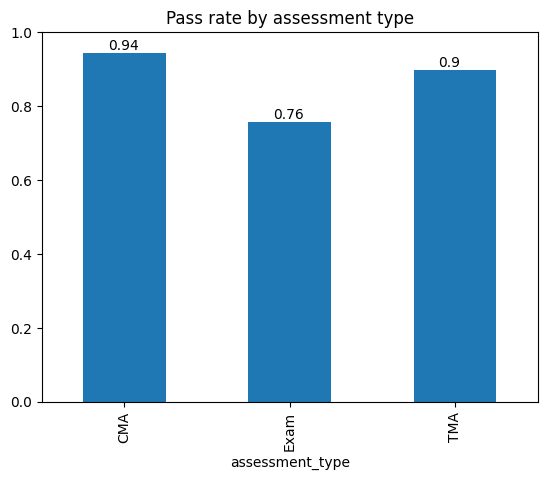

In [258]:
d = studentAssessment_df.copy()
d = d.merge(assessments_df, on=['id_assessment'], how='left')
d = d.groupby('assessment_type')['score'].agg(lambda x: (x >= 50).sum() / x.count())
d.plot(kind='bar', title='Pass rate by assessment type')

plt.ylim(0, 1)

for i, v in enumerate(d):
    plt.text(i - 0.1, v + 0.01, str(round(v, 2)))
plt.show()

From this we can infer that CMAs have the highest success rate.
TMA follows CMA in this with a slightly lower chance of success but still high.

The lowest is exams, here the success rate is about 3/4th of the students.

### Effects of disability on academic performance

We will be investigating the effects that having a disability has on student's performance.

Not disabled students are more likely to achieve positive results (eg pass, distinction), than their disabled peers. Disabled students are more likely to receive a failing grade or to withdraw from the class.

(array([1245.,  712.,  984.,  223.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

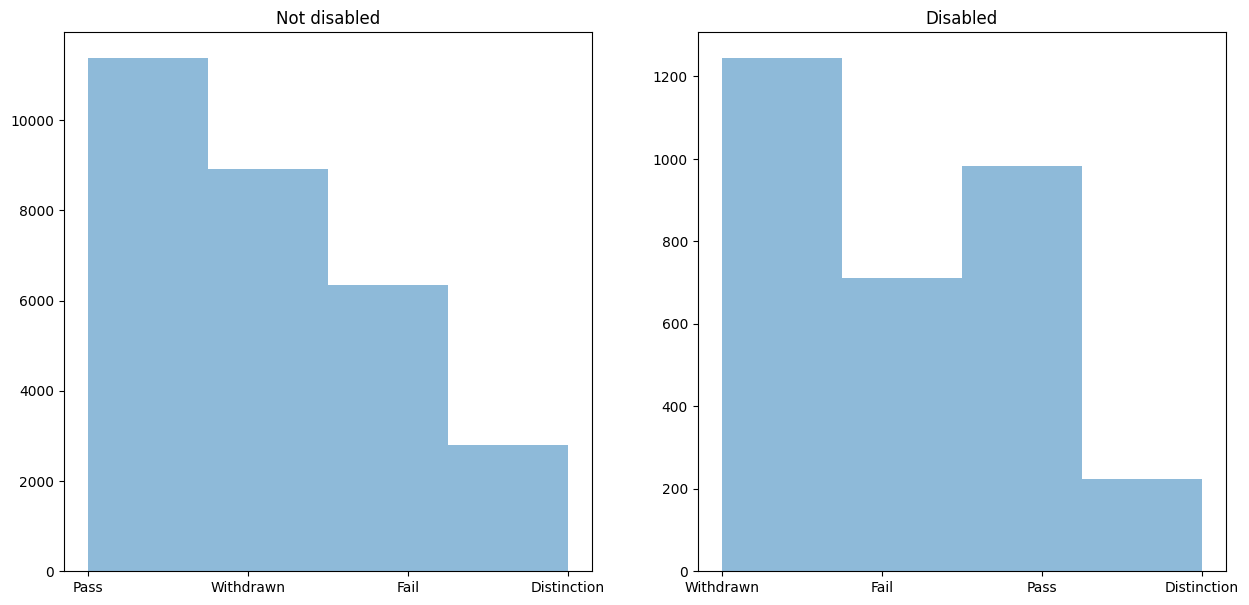

In [259]:
x = studentInfo_df.groupby('disability')['final_result'].value_counts(normalize=True, sort=False)
fg, ax = plt.subplots(1, 2)
fg.set_size_inches(15, 7)
ax[0].set_title('Not disabled')
ax[0].hist(studentInfo_df[studentInfo_df['disability'] == 0]['final_result'], bins=4, alpha=0.5, label='Not disabled')

ax[1].set_title('Disabled')
ax[1].hist(studentInfo_df[studentInfo_df['disability'] == 1]['final_result'], bins=4, alpha=0.5, label='Disabled')